In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from funcs import *
from datas import *
from models import *
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import Vocab
from collections import Counter

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Fix random seed for reproducibility
same_seeds(1689)

cuda


In [5]:
train_texts, train_labels = read_data("aclImdb/train")
test_texts, test_labels = read_data("aclImdb/test")

In [6]:
tokenizer = get_tokenizer('basic_english')
tokenized_texts = [tokenizer(text) for text in train_texts]

# Count the frequency of each token in the text data
counter = Counter(token for text in tokenized_texts for token in text)
specials = ['<unk>', '<pad>', '<bos>', '<eos>']
vocab = Vocab(counter, specials=specials)

In [7]:
dataset = CustomTextDataset(train_texts, train_labels, vocab, tokenizer)
train_size = int(len(dataset) * 0.8)
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [28]:
train_losses, train_accs, valid_losses, valid_accs = train_valid(
    LSTMClassifier(vocab_size=len(vocab), embedding_dim=100, hidden_dim=64, output_dim=1, 
                   num_layers=2, bidirectional=True, dropout=0.5), 
    train_dataset, val_dataset)

  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [1], train loss: [0.6483], train accuracy: [0.6218]
epoch [1], valid loss: [0.5669], valid accuracy: [0.7195]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [2], train loss: [0.5279], train accuracy: [0.7506]
epoch [2], valid loss: [0.5780], valid accuracy: [0.7136]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [3], train loss: [0.4402], train accuracy: [0.8068]
epoch [3], valid loss: [0.4191], valid accuracy: [0.8076]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [4], train loss: [0.3926], train accuracy: [0.8288]
epoch [4], valid loss: [0.3826], valid accuracy: [0.8250]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [5], train loss: [0.2775], train accuracy: [0.8988]
epoch [5], valid loss: [0.2995], valid accuracy: [0.8720]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [6], train loss: [0.1766], train accuracy: [0.9418]
epoch [6], valid loss: [0.3152], valid accuracy: [0.8752]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [7], train loss: [0.1358], train accuracy: [0.9573]
epoch [7], valid loss: [0.4026], valid accuracy: [0.8606]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [8], train loss: [0.1046], train accuracy: [0.9684]
epoch [8], valid loss: [0.3788], valid accuracy: [0.8813]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [9], train loss: [0.0800], train accuracy: [0.9753]
epoch [9], valid loss: [0.3844], valid accuracy: [0.8782]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [10], train loss: [0.0765], train accuracy: [0.9764]
epoch [10], valid loss: [0.3248], valid accuracy: [0.8867]


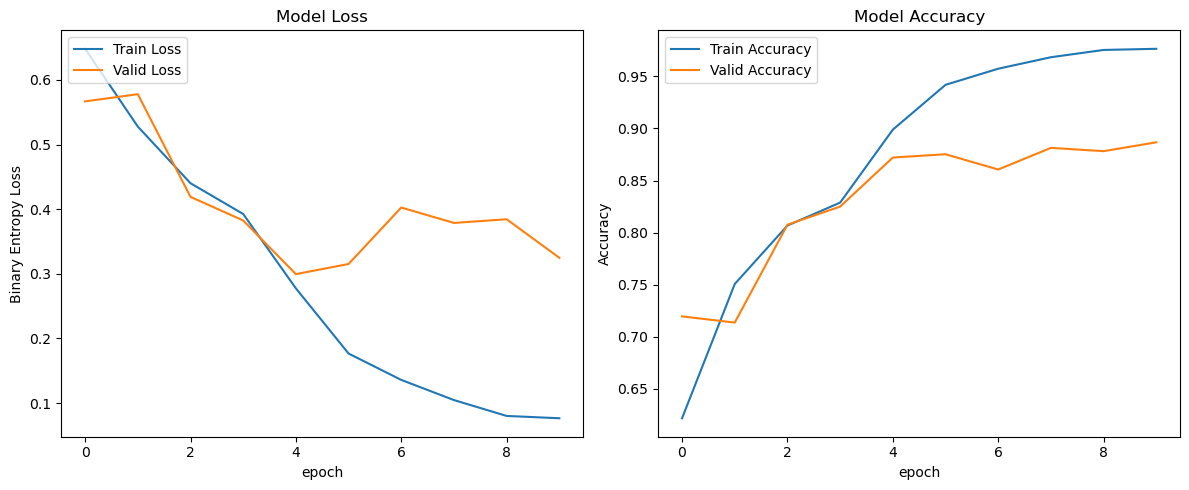

In [29]:
show_process(train_losses, train_accs, valid_losses, valid_accs)

# Train and Test

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(vocab_size=len(vocab), embedding_dim=100, hidden_dim=64, output_dim=1, num_layers=2, bidirectional=True, dropout=0.5)
model.to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5, lr=5e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98, last_epoch=-1)

batch_size = 64
n_epochs = 10
# using training set and validation set to train the model
train_loader = DataLoader(dataset, collate_fn=collate_batch, batch_size=batch_size, shuffle=True)

train_losses = []
train_accs = []

for epoch in range(1, n_epochs + 1):
    train_loss = 0
    train_acc = 0

    model.train()
    for label, text in tqdm(train_loader):
        optimizer.zero_grad()
        predictions = model(text).squeeze(1).double()
        loss = criterion(predictions, label)
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == label).float()
        acc = correct.sum() / len(correct)
        
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += acc.item()
    scheduler.step()

    train_losses.append(train_loss / len(train_loader))
    train_accs.append(train_acc / len(train_loader))
    print("epcoh [%d], train loss: [%.4f], train accuracy: [%.4f]" % (epoch, train_loss / len(train_loader), train_acc / len(train_loader)))


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [1], train loss: [0.6462], train accuracy: [0.6240]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [2], train loss: [0.5656], train accuracy: [0.7167]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [3], train loss: [0.3646], train accuracy: [0.8540]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [4], train loss: [0.2756], train accuracy: [0.8933]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [5], train loss: [0.2267], train accuracy: [0.9174]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [6], train loss: [0.1785], train accuracy: [0.9382]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [7], train loss: [0.1593], train accuracy: [0.9456]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [8], train loss: [0.1330], train accuracy: [0.9577]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [9], train loss: [0.1055], train accuracy: [0.9664]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [10], train loss: [0.0844], train accuracy: [0.9735]


In [16]:
test_dataset = CustomTextDataset(test_texts, test_labels, vocab, tokenizer)

# Create a data loader for the test dataset
test_loader = DataLoader(test_dataset, collate_fn=collate_batch, batch_size=batch_size, shuffle=False)

test_loss = 0
test_acc = 0
model.eval()
for label, text in test_loader:
    with torch.no_grad():
        predictions = model(text).squeeze(1).double()
        loss = criterion(predictions, label).float()
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == label).float()
        acc = correct.sum() / len(correct)
        
        test_loss += loss.item()
        test_acc += acc.item()
print("test loss: [%.4f], test accuracy: [%.4f]" % (test_loss / len(test_loader), test_acc / len(test_loader)))


test loss: [0.4254], test accuracy: [0.8666]


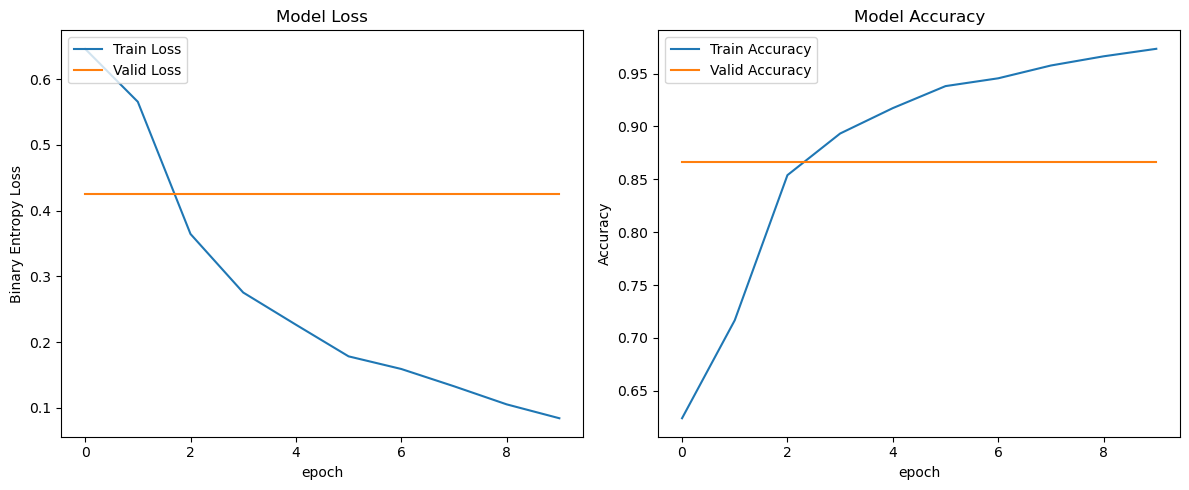

In [19]:
test_losses = [test_loss / len(test_loader) for _ in range(n_epochs)]
test_accs = [test_acc / len(test_loader) for _ in range(n_epochs)]
show_process(train_losses, train_accs, test_losses, test_accs) 